In [ ]:
# importi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# učitavanje data set-a
df = pd.read_csv('/content/drive/Shareddrives/MU/cleared_creditscore_dataset.csv')
df.head(10)

,ID,Customer_ID,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Not_Specified,Payday_Loan,Student_Loan,Mortgage_Loan,Debt_Consolidation_Loan,Low_spent,High_spent,Large_value_payments,Medium_value_payments,Small_value_payments
0,0x1602,CUS_0xd40,January,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,False,False,False,False,False,False,True,False,False,True
1,0x1603,CUS_0xd40,February,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,False,False,False,False,False,True,False,True,False,False
2,0x1604,CUS_0xd40,March,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,False,False,False,False,False,True,False,False,True,False
3,0x1605,CUS_0xd40,April,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,False,False,False,False,False,True,False,False,False,True
4,0x1606,CUS_0xd40,May,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,False,False,False,False,False,False,True,False,True,False
5,0x1607,CUS_0xd40,June,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,False,False,False,False,False,False,False,False,False,False
6,0x1608,CUS_0xd40,July,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,False,False,False,False,False,True,False,False,False,True
7,0x1609,CUS_0xd40,August,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,False,False,False,False,False,False,True,False,True,False
8,0x160e,CUS_0x21b1,January,No occupation,34847.84,3037.986667,2.0,176.0,6.0,1.0,...,False,False,False,False,False,True,False,False,False,True
9,0x160f,CUS_0x21b1,February,Teacher,34847.84,3037.986667,2.0,176.0,6.0,1.0,...,False,False,False,False,False,False,True,True,False,False


# Analiza i dodatna priprema seta podataka
Prvi korak pri izgradnji modela, jeste ponovna analiza podataka. Potrebno je provjeriti koje podatke treba dodatno transformisati. Potrebno je prvo da analiziramo moguće vrijednosti za svaku kolonu.

Nakon toga, potrebno je pretvoriti sve podatke u numeričke (jer knn algoritam zahtjeva numeričke podatke).

In [ ]:
# Nazivi varijabli i tipovi podataka
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
Credit_Score                 object
Name                         object
Age                         float64
Auto_Loan                      bool
Credit_Builder_Loan            bool
Personal_Loan               

In [ ]:
# Da bismo uspjeli izvršiti odgovarajuće transformacije podataka, potrebno je prvo da analiziramo moguće vrijednosti za svaku kolonu tipa object.
for col in df:
  if(df[col].dtypes == 'object'):
    print(col)
    print(df[col].unique())

ID
['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']
Customer_ID
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
Month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Occupation
['Scientist' 'No occupation' 'Teacher' 'Engineer' 'Entrepreneur'
 'Developer' 'Lawyer' 'Media Manager' 'Doctor' 'Journalist' 'Manager'
 'Accountant' 'Musician' 'Mechanic' 'Writer' 'Architect']
Credit_Mix
['Unknown' 'Good' 'Standard' 'Bad']
Payment_of_Min_Amount
['No' 'Yes']
Credit_Score
['Good' 'Standard' 'Poor']
Name
['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah Mcbridec' 'Nicks']


Potrebno je transformisati sljedeće kolone: Month, Occupation, Credit_Mix, Payment_of_Min_Amount te obrisati kolone ID, Customer_ID i Name

In [ ]:
#Transformacija u numericke (usput funkcija će služiti za reset podataka ukoliko su skalirani)

def reloadCsv(df):
  #  ucitavanje dataset-a
  df = pd.read_csv('/content/drive/Shareddrives/MU/cleared_creditscore_dataset.csv')

  return df

def transformNumeric(df):
  # kolone Customer_ID, ID, Name možemo obrisati
  df = df.drop(['Customer_ID', 'ID', 'Name'], axis=1)

  # pretvaramo kolonu Month u numericku
  df.loc[df["Month"] == "January", "Month"] = 1
  df.loc[df["Month"] == "February", "Month"] = 2
  df.loc[df["Month"] == "March", "Month"] = 3
  df.loc[df["Month"] == "April", "Month"] = 4
  df.loc[df["Month"] == "May", "Month"] = 5
  df.loc[df["Month"] == "June", "Month"] = 6
  df.loc[df["Month"] == "July", "Month"] = 7
  df.loc[df["Month"] == "August", "Month"] = 8
  df['Month'] = df['Month'].astype('int')

  # pretvaramo kolonu Occupation u numericku
  df.loc[df["Occupation"] == "No occupation", "Occupation"] = 0
  df.loc[df["Occupation"] == "Musician", "Occupation"] = 1
  df.loc[df["Occupation"] == "Media Manager", "Occupation"] = 2
  df.loc[df["Occupation"] == "Manager", "Occupation"] = 3
  df.loc[df["Occupation"] == "Entrepreneur", "Occupation"] = 4
  df.loc[df["Occupation"] == "Teacher", "Occupation"] = 5
  df.loc[df["Occupation"] == "Writer", "Occupation"] = 6
  df.loc[df["Occupation"] == "Journalist", "Occupation"] = 7
  df.loc[df["Occupation"] == "Lawyer", "Occupation"] = 8
  df.loc[df["Occupation"] == "Accountant", "Occupation"] = 9
  df.loc[df["Occupation"] == "Mechanic", "Occupation"] = 10
  df.loc[df["Occupation"] == "Architect", "Occupation"] = 11
  df.loc[df["Occupation"] == "Engineer", "Occupation"] = 12
  df.loc[df["Occupation"] == "Developer", "Occupation"] = 13
  df.loc[df["Occupation"] == "Scientist", "Occupation"] = 14
  df.loc[df["Occupation"] == "Doctor", "Occupation"] = 15
  df['Occupation'] = df['Occupation'].astype('int')

  # pretvaramo kolonu Credit_Mix u numericku
  df.loc[df["Credit_Mix"] == "Unknown", "Credit_Mix"] = 0
  df.loc[df["Credit_Mix"] == "Good", "Credit_Mix"] = 3
  df.loc[df["Credit_Mix"] == "Standard", "Credit_Mix"] = 2
  df.loc[df["Credit_Mix"] == "Bad", "Credit_Mix"] = 1
  df['Credit_Mix'] = df['Credit_Mix'].astype('int')

  # pretvaramo kolonu Payment_of_Min_Amount u numericku
  df.loc[df["Payment_of_Min_Amount"] == "No", "Payment_of_Min_Amount"] = 0
  df.loc[df["Payment_of_Min_Amount"] == "Yes", "Payment_of_Min_Amount"] = 1
  df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].astype('int')

  return df

In [ ]:
def transformNumericUpgraded(df):
  # kolone Customer_ID, ID, Name možemo obrisati
  df = df.drop(['Customer_ID', 'ID', 'Name'], axis=1)

  # pretvaramo kolonu Month u numericku
  df.loc[df["Month"] == "January", "Month"] = 1
  df.loc[df["Month"] == "February", "Month"] = 2
  df.loc[df["Month"] == "March", "Month"] = 3
  df.loc[df["Month"] == "April", "Month"] = 4
  df.loc[df["Month"] == "May", "Month"] = 5
  df.loc[df["Month"] == "June", "Month"] = 6
  df.loc[df["Month"] == "July", "Month"] = 7
  df.loc[df["Month"] == "August", "Month"] = 8
  df['Month'] = df['Month'].astype('int')

  # Kreiranje kolona za svaki tip posla posebno
  df['Teacher'] = np.where(df['Occupation'] == 'Teacher', True, False)
  df['Writer'] = np.where(df['Occupation'] == 'Writer', True, False)
  df['Lawyer'] = np.where(df['Occupation'] == 'Lawyer', True, False)
  df['Scientist'] = np.where(df['Occupation'] == 'Scientist', True, False)
  df['Musician'] = np.where(df['Occupation'] == 'Musician', True, False)
  df['Manager'] = np.where(df['Occupation'] == 'Manager', True, False)
  df['Entrepreneur'] = np.where(df['Occupation'] == 'Entrepreneur', True, False)
  df['Journalist'] = np.where(df['Occupation'] == 'Journalist', True, False)
  df['Accountant'] = np.where(df['Occupation'] == 'Accountant', True, False)
  df['Mechanic'] = np.where(df['Occupation'] == 'Mechanic', True, False)
  df['Architect'] = np.where(df['Occupation'] == 'Architect', True, False)
  df['Engineer'] = np.where(df['Occupation'] == 'Engineer', True, False)
  df['Developer'] = np.where(df['Occupation'] == 'Developer', True, False)
  df['Doctor'] = np.where(df['Occupation'] == 'Doctor', True, False)
  df['No occupation'] = np.where(df['Occupation'] == 'No occupation', True, False)
  df = df.drop(['Occupation'], axis=1)


  # pretvaramo kolonu Credit_Mix u numericku
  df.loc[df["Credit_Mix"] == "Unknown", "Credit_Mix"] = 0
  df.loc[df["Credit_Mix"] == "Good", "Credit_Mix"] = 3
  df.loc[df["Credit_Mix"] == "Standard", "Credit_Mix"] = 2
  df.loc[df["Credit_Mix"] == "Bad", "Credit_Mix"] = 1
  df['Credit_Mix'] = df['Credit_Mix'].astype('int')

  # pretvaramo kolonu Payment_of_Min_Amount u numericku
  df.loc[df["Payment_of_Min_Amount"] == "No", "Payment_of_Min_Amount"] = 0
  df.loc[df["Payment_of_Min_Amount"] == "Yes", "Payment_of_Min_Amount"] = 1
  df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].astype('int')

  return df

In [ ]:
# Transformacija i ispis naziva varijabli i tipova podataka nakon transformacije
df = reloadCsv(df)
df = transformNumericUpgraded(df)
df.to_csv(r'/content/drive/Shareddrives/MU/knn_cleared_creditscore_dataset.csv', index=False)
df.dtypes

Month                         int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
Credit_Score                 object
Age                         float64
Auto_Loan                      bool
Credit_Builder_Loan            bool
Personal_Loan                  bool
Home_Equity_Loan               bool
Not_Specified                  bool
Payday_Loan                    bool
Student_Loan                

# Izgradnja modela


## Model 1 - bez skaliranja

In [ ]:
# Razdvajanje podataka od labele Credit_Score
y = df['Credit_Score']
x = df.drop(['Credit_Score'], axis = 1)

In [ ]:
# Opis podataka bez dodatnog skaliranja
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,100022.0,4.500060e+00,2.291304e+00,1.000000e+00,3.000000,4.500000,6.750000,8.000000e+00
Annual_Income,100022.0,1.763843e+05,5.073754e+05,7.005930e+03,20060.230000,40678.440000,82920.200000,7.442411e+06
Monthly_Inhand_Salary,100022.0,4.198154e+03,3.186949e+03,3.036454e+02,1625.597917,3097.008333,5961.637500,1.520463e+04
Num_Bank_Accounts,100022.0,1.703318e+01,4.139908e+01,-1.000000e+00,4.000000,6.000000,8.000000,4.110000e+02
Num_Credit_Card,100022.0,2.238463e+01,4.548473e+01,0.000000e+00,4.000000,6.000000,8.000000,3.710000e+02
Interest_Rate,100022.0,7.246296e+01,1.650148e+02,1.000000e+00,8.000000,16.000000,27.000000,1.601750e+03
Num_of_Loan,100022.0,7.019676e+00,2.126335e+01,0.000000e+00,2.000000,3.000000,6.000000,3.470000e+02
Delay_from_due_date,100022.0,2.106931e+01,1.486054e+01,-5.000000e+00,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100022.0,3.070613e+01,7.715761e+01,0.000000e+00,10.000000,15.000000,19.000000,9.750000e+02
Changed_Credit_Limit,100022.0,1.038828e+01,6.542724e+00,-1.070000e+00,5.455000,9.370000,14.655000,3.111500e+01


In [ ]:
# Ponovno učitavanje podataka i pretvaranje u numeričke 
df = reloadCsv(df)
df = transformNumericUpgraded(df)

# Razdvajanje podataka od labele Credit_Score
y = df['Credit_Score']
x = df.drop(['Credit_Score'], axis = 1)

# Podjela podataka na podatke za trening i test, gdje koristimo 80% podatka za trening i preostalih 20% za testiranje
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

# Kreiranje modela 1 - bez skaliranih podataka
knn = KNeighborsClassifier(n_neighbors=5)
model1 = knn.fit(x_train, y_train)
prediction1 = model1.predict(x_test)

# Ispis tačnosti
accuracy_score(y_test, prediction1)

0.7821044738815296

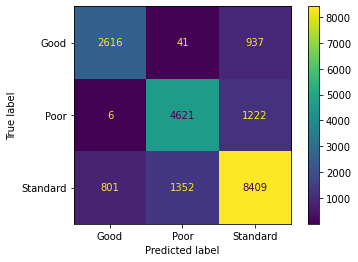

In [ ]:
#Vizuelizacija konfuzijske matrice
cm1 = confusion_matrix(y_test, prediction1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=knn.classes_)
disp.plot()
plt.show()

In [ ]:
print("Tacnost: ")
print(metrics.accuracy_score(y_test, prediction1))

#Stepen greške- error rate
print("Stepen greske: ")
print(1 - metrics.accuracy_score(y_test, prediction1))

#Osjetljivost
print("Osjetljivost: ")
print(sensitivity_score(y_test, prediction1, average='macro'))

#Specificnost
print("Specificnost: ")
print(specificity_score(y_test, prediction1, average='macro'))

#Preciznost
print("Preciznost: ")
print(precision_score(y_test, prediction1, average='macro'))

#Opoziv
print("Opoziv (recall): ")
print(recall_score(y_test, prediction1, average='macro'))

#F-score
print("F-score: ")
print(f1_score(y_test, prediction1, average='macro'))

#Kappa statistika
print("Kappa statistika: ")
print(cohen_kappa_score(y_test, prediction1))

Tacnost: 
0.7821044738815296
Stepen greske: 
0.2178955261184704
Osjetljivost: 
0.7713618039486043
Specificnost: 
0.8745957313988143
Preciznost: 
0.7761065665559443
Opoziv (recall): 
0.7713618039486043
F-score: 
0.7735362295275855
Kappa statistika: 
0.6383208935217849


In [ ]:
# Klasifikacijski izvještaj

cr1 = classification_report(y_test, prediction1)
print("Klasifikacijski izvjestaj")
print(cr1)

Klasifikacijski izvjestaj
              precision    recall  f1-score   support

        Good       0.76      0.73      0.75      3594
        Poor       0.77      0.79      0.78      5849
    Standard       0.80      0.80      0.80     10562

    accuracy                           0.78     20005
   macro avg       0.78      0.77      0.77     20005
weighted avg       0.78      0.78      0.78     20005



## Model 2 - min-max skaliranje

In [ ]:
# Ponovno učitavanje podataka i pretvaranje u numeričke 
df = reloadCsv(df)
df = transformNumericUpgraded(df)

# Razdvajanje podataka od labele Credit_Score
y = df['Credit_Score']
x = df.drop(['Credit_Score'], axis = 1)

# Primjena min-max skaliranja
mms = MinMaxScaler()
mms.fit(x)
x = mms.transform(x)

In [ ]:
# Podjela podataka na podatke za trening i test, gdje koristimo 80% podatka za trening i preostalih 20% za testiranje
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

# Kreiranje modela 2 - skalirani podaci min-max transformacijom
knn = KNeighborsClassifier(n_neighbors=7)
model2 = knn.fit(x_train, y_train)
prediction2 = model2.predict(x_test)

# Ispis tačnosti
accuracy_score(y_test, prediction2)

0.5905523619095226

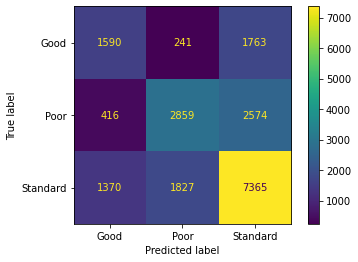

In [ ]:
#Vizuelizacija konfuzijske matrice
cm2 = confusion_matrix(y_test, prediction2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=knn.classes_)
disp.plot()
plt.show()

In [ ]:
print("Tacnost: ")
print(metrics.accuracy_score(y_test, prediction2))

#Stepen greške- error rate
print("Stepen greske: ")
print(1 - metrics.accuracy_score(y_test, prediction2))

#Osjetljivost
print("Osjetljivost: ")
print(sensitivity_score(y_test, prediction2, average='macro'))

#Specificnost
print("Specificnost: ")
print(specificity_score(y_test, prediction2, average='macro'))

#Preciznost
print("Preciznost: ")
print(precision_score(y_test, prediction2, average='macro'))

#Opoziv
print("Opoziv (recall): ")
print(recall_score(y_test, prediction2, average='macro'))

#F-score
print("F-score: ")
print(f1_score(y_test, prediction2, average='macro'))

#Kappa statistika
print("Kappa statistika: ")
print(cohen_kappa_score(y_test, prediction2))

Tacnost: 
0.5905523619095226
Stepen greske: 
0.40944763809047735
Osjetljivost: 
0.5428388755091845
Specificnost: 
0.761934027798179
Preciznost: 
0.560207709328753
Opoziv (recall): 
0.5428388755091845
F-score: 
0.5494902737990889
Kappa statistika: 
0.3046489661748617


In [ ]:
# Klasifikacijski izvještaj

cr2 = classification_report(y_test, prediction2)
print("Klasifikacijski izvjestaj")
print(cr2)

Klasifikacijski izvjestaj
              precision    recall  f1-score   support

        Good       0.47      0.44      0.46      3594
        Poor       0.58      0.49      0.53      5849
    Standard       0.63      0.70      0.66     10562

    accuracy                           0.59     20005
   macro avg       0.56      0.54      0.55     20005
weighted avg       0.59      0.59      0.59     20005



## Model 3 - z-score skaliranje

In [ ]:
# Ponovno učitavanje podataka i pretvaranje u numeričke 
df = reloadCsv(df)
df = transformNumericUpgraded(df)

# Razdvajanje podataka od labele Credit_Score
y = df['Credit_Score']
x = df.drop(['Credit_Score'], axis = 1)

# Primjena z score skaliranja
x = x.apply(stats.zscore)

In [ ]:
# Podjela podataka na podatke za trening i test, gdje koristimo 80% podatka za trening i preostalih 20% za testiranje
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

# Kreiranje modela 3 - skalirani podaci min-max transformacijom
knn = KNeighborsClassifier(n_neighbors=7)
model3 = knn.fit(x_train, y_train)
prediction3 = model3.predict(x_test)

# Ispis tačnosti
accuracy_score(y_test, prediction3)

0.7079730067483129

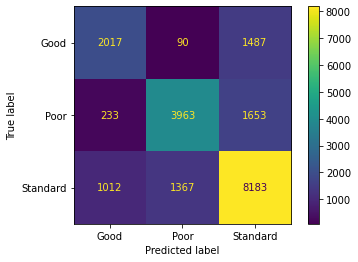

In [ ]:
#Vizuelizacija konfuzijske matrice
cm3 = confusion_matrix(y_test, prediction3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=knn.classes_)
disp.plot()
plt.show()

In [ ]:
print("Tacnost: ")
print(metrics.accuracy_score(y_test, prediction3))

#Stepen greške- error rate
print("Stepen greske: ")
print(1 - metrics.accuracy_score(y_test, prediction3))

#Osjetljivost
print("Osjetljivost: ")
print(sensitivity_score(y_test, prediction3, average='macro'))

#Specificnost
print("Specificnost: ")
print(specificity_score(y_test, prediction3, average='macro'))

#Preciznost
print("Preciznost: ")
print(precision_score(y_test, prediction3, average='macro'))

#Opoziv
print("Opoziv (recall): ")
print(recall_score(y_test, prediction3, average='macro'))

#F-score
print("F-score: ")
print(f1_score(y_test, prediction3, average='macro'))

#Kappa statistika
print("Kappa statistika: ")
print(cohen_kappa_score(y_test, prediction3))

Tacnost: 
0.7079730067483129
Stepen greske: 
0.29202699325168713
Osjetljivost: 
0.6711744732316075
Specificnost: 
0.8295634168869764
Preciznost: 
0.6907338189180011
Opoziv (recall): 
0.6711744732316075
F-score: 
0.6798511109666227
Kappa statistika: 
0.5072578890718662


In [ ]:
# Klasifikacijski izvještaj

cr3 = classification_report(y_test, prediction3)
print("Klasifikacijski izvjestaj")
print(cr3)

Klasifikacijski izvjestaj
              precision    recall  f1-score   support

        Good       0.62      0.56      0.59      3594
        Poor       0.73      0.68      0.70      5849
    Standard       0.72      0.77      0.75     10562

    accuracy                           0.71     20005
   macro avg       0.69      0.67      0.68     20005
weighted avg       0.71      0.71      0.71     20005



## Odabir modela za dalje razmatranje
Nakon kreiranja 3 modela možemo zaključiti da model 1 (model bez skaliranih podataka) daje najbolje rezultate. Prije svega **model 1 ima tačnost od 78%**, dok modeli sa min-max i z-score skaliranjem daju tačnosti od 59% i 70% respketivno. Osim toga, posmatrajću kalsifikacijske izvještaje za sva 3 modela, vidimo da model 1 ima znatno bolje rezultate kada posmatramo preciznost, opoziv, osjetljivost te f1 mjere.

Razlog zbog čega se ovo dešava može biti to da su pri predikciji labele određene kolone bitnije od drugih, pa skaliranje podataka daje lošije rezultate. Što vjerovatno ima smisla, jer kolona *Annual_Income* sigurno ima veći utjecaj na *Credit_Score* nego neke druge kolone pa je loša ideja skalirati podatke da budu u istom rangu, odnosno ne bi trebali izjednačavati značaj svih kolona pri izradi modela. 

U nastavku ćemo pokušati nadograditi **model 1** kako bi dodatno poboljšali njegove performanse. 

# Nadogradnja odabranog modela

Sada ćemo pokušati nadograditi odabrani model. Prije svega detaljnije ćemo analizirati konfuzijsku matricu odabranog modela.

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import metrics
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score

In [ ]:
# Ponovno učitavanje podataka i pretvaranje u numeričke 
df = reloadCsv(df)
df = transformNumericUpgraded(df)

# Razdvajanje podataka od labele Credit_Score
y = df['Credit_Score']
x = df.drop(['Credit_Score'], axis = 1)

# Podjela podataka na podatke za trening i test, gdje koristimo 80% podatka za trening i preostalih 20% za testiranje
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

# Kreiranje modela 1 - bez skaliranih podataka
knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(x_train, y_train)
prediction = model.predict(x_test)

print("Tacnost: ")
print(metrics.accuracy_score(y_test, prediction))

#Stepen greške- error rate
print("Stepen greske: ")
print(1 - metrics.accuracy_score(y_test, prediction))

#Osjetljivost
print("Osjetljivost: ")
print(sensitivity_score(y_test, prediction, average='macro'))

#Specificnost
print("Specificnost: ")
print(specificity_score(y_test, prediction, average='macro'))

#Preciznost
print("Preciznost: ")
print(precision_score(y_test, prediction, average='macro'))

#Opoziv
print("Opoziv (recall): ")
print(recall_score(y_test, prediction, average='macro'))

#F-score
print("F-score: ")
print(f1_score(y_test, prediction, average='macro'))

#Kappa statistika
print("Kappa statistika: ")
print(cohen_kappa_score(y_test, prediction))

Tacnost: 
0.7821044738815296
Stepen greske: 
0.2178955261184704
Osjetljivost: 
0.7713618039486043
Specificnost: 
0.8745957313988143
Preciznost: 
0.7761065665559443
Opoziv (recall): 
0.7713618039486043
F-score: 
0.7735362295275855
Kappa statistika: 
0.6383208935217849


Sada ćemo pokušati dobiti veću tačnost koristeći metode oversamplinga i undersamplinga. 

In [ ]:
# Restart podataka
df = reloadCsv(df)
df = transformNumericUpgraded(df)

y = df['Credit_Score']
x = df.drop(['Credit_Score'], axis = 1)

# Podjela podataka na podatke za trening i test, gdje koristimo 80% podatka za trening i preostalih 20% za testiranje
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

# Undersampling
undersampler=RandomUnderSampler(sampling_strategy='majority')

#primjena undersampling strategije
x_under, y_under=undersampler.fit_resample(x_train, y_train)
x_under, y_under=undersampler.fit_resample(x_under, y_under)


#prikaz balansiranosti seta podataka
print(np.unique(y_train, return_counts=True))
print(np.unique(y_under, return_counts=True))

#Kreiranje modela sa podacima undersampliranim
knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(x_under, y_under)
prediction = model.predict(x_test)

# Ispis tačnosti
accuracy_score(y_test, prediction)

(array(['Good', 'Poor', 'Standard'], dtype=object), array([14238, 23159, 42620]))
(array(['Good', 'Poor', 'Standard'], dtype=object), array([14238, 14238, 14238]))


0.6350412396900775

In [ ]:
# Restart podataka
df = reloadCsv(df)
df = transformNumericUpgraded(df)

y = df['Credit_Score']
x = df.drop(['Credit_Score'], axis = 1)

# Podjela podataka na podatke za trening i test, gdje koristimo 80% podatka za trening i preostalih 20% za testiranje
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

# Oversampling
oversample=RandomOverSampler(sampling_strategy='minority')

#primjena oversample strategije
x_under, y_under=oversample.fit_resample(x_train, y_train)
x_under, y_under=oversample.fit_resample(x_under, y_under)

#prikaz balansiranosti seta podataka
print(np.unique(y_train, return_counts=True))
print(np.unique(y_under, return_counts=True))

#Kreiranje modela sa podacima undersampliranim
knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(x_under, y_under)
prediction = model.predict(x_test)

# Ispis tačnosti
accuracy_score(y_test, prediction)

(array(['Good', 'Poor', 'Standard'], dtype=object), array([14238, 23159, 42620]))
(array(['Good', 'Poor', 'Standard'], dtype=object), array([42620, 42620, 42620]))


0.7560109972506873

Može se primijetiti da metode oversamplinga i undersamplinga nisu dovele do poboljšanja tačnosti modela. Čak šta više, tačnost je opala nakon primjene ovih metoda.

In [ ]:
# Ponovno učitavanje podataka i pretvaranje u numeričke 
df = reloadCsv(df)
df = transformNumericUpgraded(df)

# Razdvajanje podataka od labele Credit_Score
y = df['Credit_Score']
x = df.drop(['Credit_Score'], axis = 1)

# Podjela podataka na podatke za trening i test, gdje koristimo 80% podatka za trening i preostalih 20% za testiranje
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

# Kreiranje modela 1.1 - bez skaliranih podataka, distance
knn = KNeighborsClassifier(weights = 'distance', n_neighbors=5)
model1 = knn.fit(x_train, y_train)
prediction1 = model1.predict(x_test)

# Ispis tačnosti
accuracy_score(y_test, prediction1)

0.7836540864783804

In [ ]:
# Ponovno učitavanje podataka i pretvaranje u numeričke 
df = reloadCsv(df)
df = transformNumericUpgraded(df)

# Razdvajanje podataka od labele Credit_Score
y = df['Credit_Score']
x = df.drop(['Credit_Score'], axis = 1)

# Podjela podataka na podatke za trening i test, gdje koristimo 80% podatka za trening i preostalih 20% za testiranje
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

# Kreiranje modela 1.2 - bez skaliranih podataka, distance, ball_tree
knn = KNeighborsClassifier(weights = 'distance', algorithm = 'ball_tree', n_neighbors=5)
model1 = knn.fit(x_train, y_train)
prediction1 = model1.predict(x_test)

# Ispis tačnosti
accuracy_score(y_test, prediction1)

0.807748062984254

In [ ]:
# Ponovno učitavanje podataka i pretvaranje u numeričke 
df = reloadCsv(df)
df = transformNumericUpgraded(df)

# Razdvajanje podataka od labele Credit_Score
y = df['Credit_Score']
x = df.drop(['Credit_Score'], axis = 1)

# Podjela podataka na podatke za trening i test, gdje koristimo 80% podatka za trening i preostalih 20% za testiranje
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

# Kreiranje modela 1.3 - bez skaliranih podataka, distance, kd_tree
knn = KNeighborsClassifier(weights = 'distance', algorithm = 'kd_tree', n_neighbors=5)
model1 = knn.fit(x_train, y_train)
prediction1 = model1.predict(x_test)

# Ispis tačnosti
accuracy_score(y_test, prediction1)

0.807748062984254

In [ ]:
# Ponovno učitavanje podataka i pretvaranje u numeričke 
df = reloadCsv(df)
df = transformNumericUpgraded(df)

# Razdvajanje podataka od labele Credit_Score
y = df['Credit_Score']
x = df.drop(['Credit_Score'], axis = 1)

# Podjela podataka na podatke za trening i test, gdje koristimo 80% podatka za trening i preostalih 20% za testiranje
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

# Kreiranje modela 1.4 - bez skaliranih podataka, distance, brute
knn = KNeighborsClassifier(weights = 'distance', algorithm = 'brute', n_neighbors=5)
model1 = knn.fit(x_train, y_train)
prediction1 = model1.predict(x_test)

# Ispis tačnosti
accuracy_score(y_test, prediction1)

0.7836540864783804

In [ ]:
# Ponovno učitavanje podataka i pretvaranje u numeričke 
df = reloadCsv(df)
df = transformNumericUpgraded(df)

# Razdvajanje podataka od labele Credit_Score
y = df['Credit_Score']
x = df.drop(['Credit_Score'], axis = 1)

# Podjela podataka na podatke za trening i test, gdje koristimo 80% podatka za trening i preostalih 20% za testiranje
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

# Kreiranje modela 1.5 - bez skaliranih podataka, distance, ball_tree, cityblock
knn = KNeighborsClassifier(weights = 'distance', algorithm = 'ball_tree', metric='cityblock', n_neighbors=5)
model1 = knn.fit(x_train, y_train)
prediction1 = model1.predict(x_test)

# Ispis tačnosti
accuracy_score(y_test, prediction1)

0.8103474131467133

In [ ]:
# Ponovno učitavanje podataka i pretvaranje u numeričke 
df = reloadCsv(df)
df = transformNumericUpgraded(df)

# Razdvajanje podataka od labele Credit_Score
y = df['Credit_Score']
x = df.drop(['Credit_Score'], axis = 1)

# Podjela podataka na podatke za trening i test, gdje koristimo 80% podatka za trening i preostalih 20% za testiranje
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

# Kreiranje modela 1.6 - bez skaliranih podataka, distance, ball_tree, euclidean
knn = KNeighborsClassifier(weights = 'distance', algorithm = 'ball_tree', metric='euclidean', n_neighbors=5)
model1 = knn.fit(x_train, y_train)
prediction1 = model1.predict(x_test)

# Ispis tačnosti
accuracy_score(y_test, prediction1)

0.807748062984254

In [ ]:
# Ponovno učitavanje podataka i pretvaranje u numeričke 
df = reloadCsv(df)
df = transformNumericUpgraded(df)

# Razdvajanje podataka od labele Credit_Score
y = df['Credit_Score']
x = df.drop(['Credit_Score'], axis = 1)

# Podjela podataka na podatke za trening i test, gdje koristimo 80% podatka za trening i preostalih 20% za testiranje
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

# Kreiranje modela 1.7 - bez skaliranih podataka, distance, ball_tree, manhattan
knn = KNeighborsClassifier(weights = 'distance', algorithm = 'ball_tree', metric='manhattan', n_neighbors=5)
model1 = knn.fit(x_train, y_train)
prediction1 = model1.predict(x_test)

# Ispis tačnosti
accuracy_score(y_test, prediction1)

0.8103474131467133

In [ ]:
# Ponovno učitavanje podataka i pretvaranje u numeričke 
df = reloadCsv(df)
df = transformNumericUpgraded(df)

# Razdvajanje podataka od labele Credit_Score
y = df['Credit_Score']
x = df.drop(['Credit_Score'], axis = 1)

# Podjela podataka na podatke za trening i test, gdje koristimo 80% podatka za trening i preostalih 20% za testiranje
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

# Kreiranje modela 1.8 - bez skaliranih podataka, distance, ball_tree, l1
knn = KNeighborsClassifier(weights = 'distance', algorithm = 'ball_tree', metric='l1', n_neighbors=5)
model1 = knn.fit(x_train, y_train)
prediction1 = model1.predict(x_test)

# Ispis tačnosti
accuracy_score(y_test, prediction1)

0.8103474131467133

In [ ]:
# Ponovno učitavanje podataka i pretvaranje u numeričke 
df = reloadCsv(df)
df = transformNumericUpgraded(df)

# Razdvajanje podataka od labele Credit_Score
y = df['Credit_Score']
x = df.drop(['Credit_Score'], axis = 1)

# Podjela podataka na podatke za trening i test, gdje koristimo 80% podatka za trening i preostalih 20% za testiranje
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

# Kreiranje modela 1.9 - bez skaliranih podataka, distance, ball_tree, l2
knn = KNeighborsClassifier(weights = 'distance', algorithm = 'ball_tree', metric='l2', n_neighbors=5)
model1 = knn.fit(x_train, y_train)
prediction1 = model1.predict(x_test)

# Ispis tačnosti
accuracy_score(y_test, prediction1)

0.807748062984254

In [ ]:
scores = []
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)
for i in range (1, 30, 2):
  knn = KNeighborsClassifier(weights = 'distance', algorithm = 'ball_tree', metric='l1', n_neighbors=i)
  model = knn.fit(x_train, y_train)
  prediction = model.predict(x_test)
  scores.append(accuracy_score(y_test, prediction))
  print('n =', i)
  print(accuracy_score(y_test, prediction))

n = 1
0.7896525868532867
n = 3
0.8038490377405648
n = 5
0.8103474131467133
n = 7
0.811647088227943
n = 9
0.811197200699825
n = 11
0.8109972506873282
n = 13
0.810947263184204
n = 15
0.8113971507123219
n = 17
0.8112971757060735
n = 19
0.811197200699825
n = 21
0.8111472131967008
n = 23
0.810947263184204
n = 25
0.8107973006748312
n = 27
0.8110472381904524
n = 29
0.8107473131717071


In [ ]:
for i in range (31, 101, 2):
  knn = KNeighborsClassifier(weights = 'distance', algorithm = 'ball_tree', metric='l1', n_neighbors=i)
  model = knn.fit(x_train, y_train)
  prediction = model.predict(x_test)
  scores.append(accuracy_score(y_test, prediction))
  print('n =', i)
  print(accuracy_score(y_test, prediction))

n = 31
0.8112971757060735
n = 33
0.810947263184204
n = 35
0.8107973006748312
n = 37
0.8107973006748312
n = 39
0.8108972756810797
n = 41
0.8108972756810797
n = 43
0.8109972506873282
n = 45
0.8110472381904524
n = 47
0.8112471882029493
n = 49
0.8113971507123219
n = 51
0.8115471132216946
n = 53
0.8116970757310672
n = 55
0.8115971007248188
n = 57
0.8119470132466883
n = 59
0.8117470632341914
n = 61
0.8119470132466883
n = 63
0.8117470632341914
n = 65
0.8118470382404399
n = 67
0.8116970757310672
n = 69
0.8118470382404399
n = 71
0.8115971007248188
n = 73
0.8114471382154461
n = 75
0.8115471132216946
n = 77
0.8117470632341914
n = 79
0.811647088227943
n = 81
0.8115971007248188
n = 83
0.8115971007248188
n = 85
0.8114971257185704
n = 87
0.8114971257185704
n = 89
0.8113471632091978
n = 91
0.8113471632091978
n = 93
0.8112471882029493
n = 95
0.8114471382154461
n = 97
0.8115971007248188
n = 99
0.8114971257185704


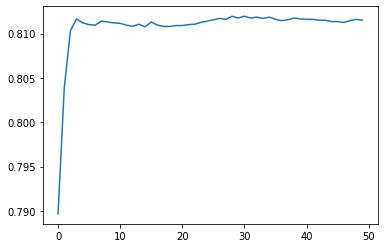

In [ ]:
import matplotlib.pyplot as plt
plt.plot(scores)

In [ ]:
max(scores)

0.8119470132466883

In [ ]:
# Ponovno učitavanje podataka i pretvaranje u numeričke 
df = reloadCsv(df)
df = transformNumericUpgraded(df)

# Razdvajanje podataka od labele Credit_Score
y = df['Credit_Score']
x = df.drop(['Credit_Score'], axis = 1)

# Podjela podataka na podatke za trening i test, gdje koristimo 80% podatka za trening i preostalih 20% za testiranje
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

# Kreiranje modela 1.8 - bez skaliranih podataka, distance, ball_tree, l1
knn = KNeighborsClassifier(weights = 'distance', algorithm = 'ball_tree', metric='l1', n_neighbors=61)
model1 = knn.fit(x_train, y_train)
prediction1 = model1.predict(x_test)

# Ispis tačnosti
accuracy_score(y_test, prediction1)

0.8119470132466883

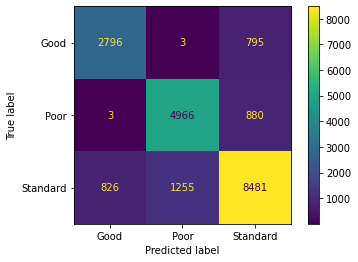

In [ ]:
cm1 = confusion_matrix(y_test, prediction1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=knn.classes_)
disp.plot()
plt.show()

In [ ]:
print("Tacnost: ")
print(metrics.accuracy_score(y_test, prediction1))

#Stepen greške- error rate
print("Stepen greske: ")
print(1 - metrics.accuracy_score(y_test, prediction1))

#Osjetljivost
print("Osjetljivost: ")
print(sensitivity_score(y_test, prediction1, average='macro'))

#Specificnost
print("Specificnost: ")
print(specificity_score(y_test, prediction1, average='macro'))

#Preciznost
print("Preciznost: ")
print(precision_score(y_test, prediction1, average='macro'))

#Opoziv
print("Opoziv (recall): ")
print(recall_score(y_test, prediction1, average='macro'))

#F-score
print("F-score: ")
print(f1_score(y_test, prediction1, average='macro'))

#Kappa statistika
print("Kappa statistika: ")
print(cohen_kappa_score(y_test, prediction1))

Tacnost: 
0.8119470132466883
Stepen greske: 
0.18805298675331172
Osjetljivost: 
0.8099900722750714
Specificnost: 
0.894412706668787
Preciznost: 
0.8014207951791662
Opoziv (recall): 
0.8099900722750714
F-score: 
0.8053310106951738
Kappa statistika: 
0.6909288190464222


In [ ]:
#Kreiranje instance pipeline
pipeline = make_pipeline(KNeighborsClassifier(n_neighbors=5))

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
strtfdKFold = StratifiedKFold(n_splits=30,)
kfold = strtfdKFold.split(x_train, y_train)
scores = []
#
for k, (train, test) in enumerate(kfold):
    pipeline.fit(x_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(x_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Accuracy: %.3f' % (k+1, score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Accuracy: 0.780
Fold:  2, Accuracy: 0.746
Fold:  3, Accuracy: 0.780
Fold:  4, Accuracy: 0.747
Fold:  5, Accuracy: 0.760
Fold:  6, Accuracy: 0.775
Fold:  7, Accuracy: 0.778
Fold:  8, Accuracy: 0.772
Fold:  9, Accuracy: 0.761
Fold: 10, Accuracy: 0.782
Fold: 11, Accuracy: 0.781
Fold: 12, Accuracy: 0.747
Fold: 13, Accuracy: 0.773
Fold: 14, Accuracy: 0.769
Fold: 15, Accuracy: 0.773
Fold: 16, Accuracy: 0.768
Fold: 17, Accuracy: 0.766
Fold: 18, Accuracy: 0.775
Fold: 19, Accuracy: 0.754
Fold: 20, Accuracy: 0.761
Fold: 21, Accuracy: 0.781
Fold: 22, Accuracy: 0.761
Fold: 23, Accuracy: 0.744
Fold: 24, Accuracy: 0.782
Fold: 25, Accuracy: 0.765
Fold: 26, Accuracy: 0.779
Fold: 27, Accuracy: 0.782
Fold: 28, Accuracy: 0.750
Fold: 29, Accuracy: 0.756
Fold: 30, Accuracy: 0.752


Cross-Validation accuracy: 0.767 +/- 0.013


In [ ]:
#Kreiranje instance pipeline nakon tuninga parametara
pipeline = make_pipeline(KNeighborsClassifier(weights = 'distance', algorithm = 'ball_tree', metric='l1', n_neighbors=61))

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
strtfdKFold = StratifiedKFold(n_splits=30,)
kfold = strtfdKFold.split(x_train, y_train)
scores = []
#
for k, (train, test) in enumerate(kfold):
    pipeline.fit(x_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(x_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Accuracy: %.3f' % (k+1, score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Accuracy: 0.805
Fold:  2, Accuracy: 0.820
Fold:  3, Accuracy: 0.816
Fold:  4, Accuracy: 0.815
Fold:  5, Accuracy: 0.800
Fold:  6, Accuracy: 0.816
Fold:  7, Accuracy: 0.808
Fold:  8, Accuracy: 0.808
Fold:  9, Accuracy: 0.816
Fold: 10, Accuracy: 0.811
Fold: 11, Accuracy: 0.818
Fold: 12, Accuracy: 0.802
Fold: 13, Accuracy: 0.802
Fold: 14, Accuracy: 0.801
Fold: 15, Accuracy: 0.804
Fold: 16, Accuracy: 0.800
Fold: 17, Accuracy: 0.804
Fold: 18, Accuracy: 0.810
Fold: 19, Accuracy: 0.801
Fold: 20, Accuracy: 0.817
Fold: 21, Accuracy: 0.816
Fold: 22, Accuracy: 0.793
Fold: 23, Accuracy: 0.808
Fold: 24, Accuracy: 0.811
Fold: 25, Accuracy: 0.797
Fold: 26, Accuracy: 0.811
Fold: 27, Accuracy: 0.807
Fold: 28, Accuracy: 0.802
Fold: 29, Accuracy: 0.801
Fold: 30, Accuracy: 0.801


Cross-Validation accuracy: 0.807 +/- 0.007
